In [87]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, random_state=2021)
    
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[target])

    
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[target])
    return X_train, X_test, y_train, y_test 
    
df = pd.read_csv("C:\\Users\\jyj42\\스터디2\\Study\\yujin\\datas\\diabetes.csv")
X_train, X_test, y_train, y_test = exam_data_load(df, target='Outcome')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 9), (154, 9), (614, 2), (154, 2))

In [88]:
df.info()
df

ran = abs(np.quantile(X_train['Insulin'],0.75)-np.quantile(X_train['Insulin'],0.25))*1.5
X_train[X_train['Insulin']>np.quantile(X_train['Insulin'],0.75)+ran] = np.median(X_train['Insulin'])
X_train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
147,147,2,106,64,35,119,30.5,1.400,34
344,344,8,95,72,0,0,36.8,0.485,57
390,390,1,100,66,29,196,32.0,0.444,42
150,150,1,136,74,50,204,37.4,0.399,24
132,132,3,170,64,37,225,34.5,0.356,30
...,...,...,...,...,...,...,...,...,...
621,621,2,92,76,20,0,24.2,1.698,28
128,128,1,117,88,24,145,34.5,0.403,40
57,57,0,100,88,60,110,46.8,0.962,31
341,341,1,95,74,21,73,25.9,0.673,36


In [89]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train['Outcome'])

RandomForestClassifier()

In [90]:
pred=rf.predict(X_test)
pred

rf.score(X_test,y_test['Outcome'])

0.7792207792207793

([<matplotlib.axis.YTick at 0x214e70a15d0>,
 [Text(0, 0.0, '0.0'),
  Text(0, 44.526315789473685, '44.5'),
  Text(0, 89.05263157894737, '89.1'),
  Text(0, 133.57894736842104, '133.6'),
  Text(0, 178.10526315789474, '178.1'),
  Text(0, 222.63157894736844, '222.6'),
  Text(0, 267.1578947368421, '267.2'),
  Text(0, 311.6842105263158, '311.7'),
  Text(0, 356.2105263157895, '356.2'),
  Text(0, 400.7368421052632, '400.7'),
  Text(0, 445.2631578947369, '445.3'),
  Text(0, 489.7894736842105, '489.8'),
  Text(0, 534.3157894736842, '534.3'),
  Text(0, 578.8421052631579, '578.8'),
  Text(0, 623.3684210526316, '623.4'),
  Text(0, 667.8947368421053, '667.9'),
  Text(0, 712.421052631579, '712.4'),
  Text(0, 756.9473684210526, '756.9'),
  Text(0, 801.4736842105264, '801.5'),
  Text(0, 846.0, '846.0')])

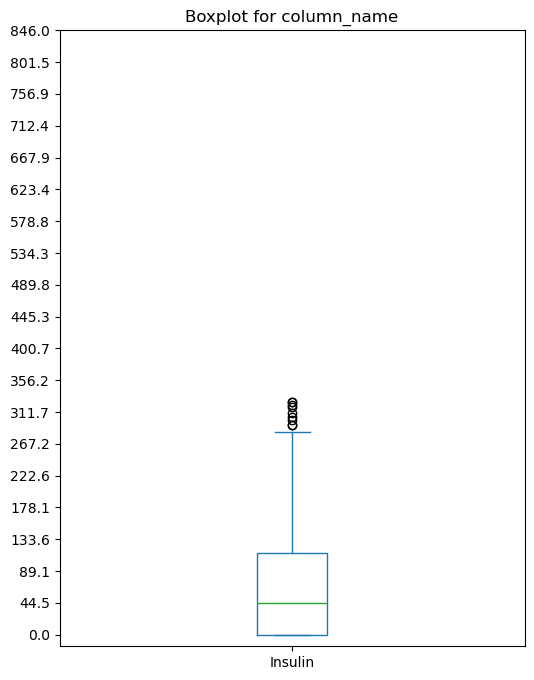

In [91]:
import matplotlib.pyplot as plt
import numpy as np

# 특정 열에 대한 박스플롯 그리기
plt.figure(figsize=(6, 8))
X_train['Insulin'].plot(kind='box')
plt.title("Boxplot for column_name")

# y축 눈금 조정 (예: 최솟값 ~ 최댓값 구간을 20개로 나눔)
y_min = df['Insulin'].min()
y_max = df['Insulin'].max()
plt.yticks(np.linspace(y_min, y_max, 20))

([<matplotlib.axis.YTick at 0x214e71391d0>,
 [Text(0, 0.078, '0.08'),
  Text(0, 2.3896842105263154, '2.39'),
  Text(0, 4.701368421052631, '4.70'),
  Text(0, 7.0130526315789465, '7.01'),
  Text(0, 9.324736842105262, '9.32'),
  Text(0, 11.636421052631578, '11.64'),
  Text(0, 13.948105263157892, '13.95'),
  Text(0, 16.259789473684208, '16.26'),
  Text(0, 18.571473684210524, '18.57'),
  Text(0, 20.88315789473684, '20.88'),
  Text(0, 23.194842105263156, '23.19'),
  Text(0, 25.506526315789472, '25.51'),
  Text(0, 27.818210526315784, '27.82'),
  Text(0, 30.1298947368421, '30.13'),
  Text(0, 32.44157894736842, '32.44'),
  Text(0, 34.753263157894736, '34.75'),
  Text(0, 37.06494736842105, '37.06'),
  Text(0, 39.37663157894737, '39.38'),
  Text(0, 41.688315789473684, '41.69'),
  Text(0, 44.0, '44.00')])

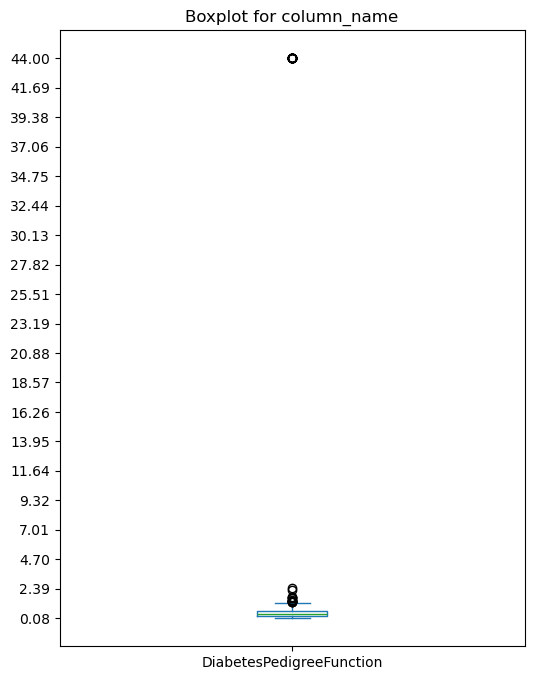

In [92]:
plt.figure(figsize=(6, 8))
X_train['DiabetesPedigreeFunction'].plot(kind='box')
plt.title("Boxplot for column_name")

# y축 눈금 조정 (예: 최솟값 ~ 최댓값 구간을 20개로 나눔)
y_min = X_train['DiabetesPedigreeFunction'].min()
y_max = X_train['DiabetesPedigreeFunction'].max()
plt.yticks(np.linspace(y_min, y_max, 20))